ConversionError: Failed to convert value(s) to axis units: <Quantity([-4.5        -4.42853    -4.35520343 -4.27992126 -4.20257631 -4.12305234
 -4.04122302 -3.95695067 -3.87008492 -3.78046107 -3.68789821 -3.59219704
 -3.49313726 -3.39047452 -3.28393682 -3.17322011 -3.05798313 -2.93784099
 -2.81235748 -2.68103547 -2.54330503 -2.39850846 -2.24588134 -2.08452805
 -1.91338994 -1.73120324 -1.53644229 -1.32724185 -1.10128816 -0.85566251
 -0.58661006 -0.28918637  0.04330503  0.42025268  0.85540682  1.37008492
  2.        ], 'delta_degree_Celsius')>

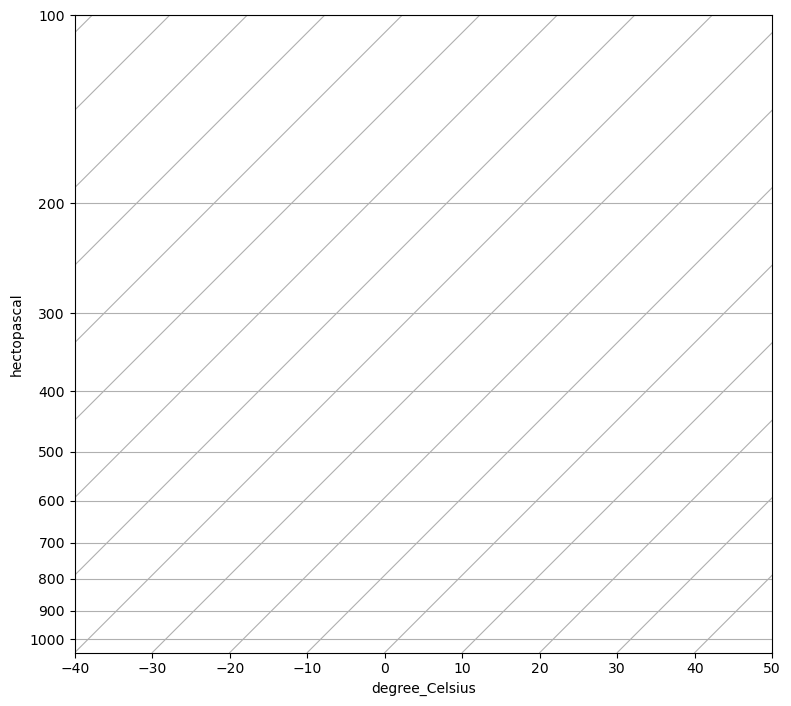

In [2]:
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units
import numpy as np
import pandas as pd

# --------------------------
# Example synthetic sounding
# --------------------------
pressure = np.linspace(1000, 100, 37) * units.hPa

# FIXED: attach units to constants and use pressure.magnitude for log10
temperature = (15 * units.degC) - (6.5 * np.log10(pressure.magnitude) * units.degC)
dewpoint = temperature - 5 * units.degC
wind_speed = 20 * np.ones_like(pressure) * units.knots
wind_dir = 270 * np.ones_like(pressure) * units.degrees

# --------------------------
# Create the Skew-T figure
# --------------------------
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

skew.plot(pressure, temperature, 'r', label='Temperature')
skew.plot(pressure, dewpoint, 'g', label='Dewpoint')
skew.plot_barbs(pressure, wind_speed, wind_dir)

skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 40)
skew.ax.set_title('Sample Skew-T', fontsize=16)
skew.ax.legend()

# Save figure
plt.savefig('../figures/skewt_sample.png', dpi=150)
plt.show()
